# IT Salary survey for Europe

IT Salary Survey for EU region (2018-2020): This data set was created collecting answers from an anonymous salary survey among European IT specialists concentrating on Germany.

Project: Exploratory analysis of 2020 salary data for IT European Specialists.



In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
# conda install -c anaconda seaborn
# !pip install jupyterthemes

# !jt -r
# !jt -t chesterish
# from jupyterthemes import get_themes
# import jupyterthemes as jt
# from jupyterthemes.stylefx import set_nb_theme

# set_nb_theme('oceans16')

##### dark themes:
onedork,
grade3,
oceans16,
chesterish, 
monokai

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
import plotly.express as plex 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from scipy import stats
import math 
import os


In [4]:
os.getcwd()

'C:\\Users\\12172\\Desktop\\Course\\IBM Machine Learning Certification\\IBM EDA for Machine Learning'

In [5]:
## reading the data: 

salary = pd.read_csv('IT_Salary_Survey_EU _2020.csv')
salary.head(3)

Timestamp   Age Gender    City          Position   \
0  24/11/2020 11:14:15  26.0   Male  Munich  Software Engineer   
1  24/11/2020 11:14:16  26.0   Male  Berlin  Backend Developer   
2  24/11/2020 11:14:21  29.0   Male  Berlin  Software Engineer   

  Total years of experience Years of experience in Germany Seniority level  \
0                         5                              3          Senior   
1                         7                              4          Senior   
2                        12                              6            Lead   

  Your main technology / programming language  \
0                                  TypeScript   
1                                        Ruby   
2                     Javascript / Typescript   

  Other technologies/programming languages you use often  ...  \
0                    Kotlin, Javascript / Typescript      ...   
1                                                NaN      ...   
2                    Javascript / Typescript, Docker      ...   

   Annual bonus+stocks one year ago. Only answer if staying in same country  \
0                                              10000                          
1                                               5000                          
2                                             100000                          

  Number of vacation days           Employment status   Сontract duration  \
0                      30          Full-time employee  Unlimited contract   
1                      28          Full-time employee  Unlimited contract   
2                      30  Self-employed (freelancer)  Temporary contract   

  Main language at work Company size Company type  \
0               English       51-100      Product   
1               English     101-1000      Product   
2               English     101-1000      Product   

  Have you lost your job due to the coronavirus outbreak?  \
0                                                 No        
1                                                 No        
2                                                Yes        

  Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week  \
0                                                NaN                                                  
1                                                NaN                                                  
2                                                NaN                                                  

  Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR  
0                                                NaN                                                                       
1                                                NaN                                                                       
2                                                NaN                                                                       

[3 rows x 23 columns]

### Phase 1:
Step 1: Import the pandas and NumPy libraries\
Step 2: Read the IT_Salary_Survey_EU.CSV file\
Step 3: Create a new cell with variable salary_data\
Step 4: Print information about the dataset and first few rows

In [6]:
salary.shape
display(salary.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Timestamp                                                                                                                1253 non-null   object 
 1   Age                                                                                                                      1226 non-null   float64
 2   Gender                                                                                                                   1243 non-null   object 
 3   City                                                                                                                     1253 non-null   o

None

##### Observations:
* The Column names need to be cleaned as they are mix of upper case and lower case letters and some columns have long name making it hard to read 
*  Most of the columns has null values like Gender, Main language at work, etc
* The Column values need to be cleaned as they are aphanumeric charaters that doesnt make sense
* change datatypes of columns to operate on them like changing salary columns from object to float64 or Int64
* Replacing columns values into appropriate form 
* Extracting Year infomation from timestamp columns


## Phase 2: Modify Column Names

**Step 1:** Print array of existing column names\
**Step 2:** Make changes to column names from mixcase to lowercase\
**Step 3:** Change the Column names for better readibility\
**Step 4:** Look at the current state of the `salary_data`

In [7]:
salary.columns = salary.columns.str.lower()
salary.columns

Index(['timestamp', 'age', 'gender', 'city', 'position ',
       'total years of experience', 'years of experience in germany',
       'seniority level', 'your main technology / programming language',
       'other technologies/programming languages you use often',
       'yearly brutto salary (without bonus and stocks) in eur',
       'yearly bonus + stocks in eur',
       'annual brutto salary (without bonus and stocks) one year ago. only answer if staying in the same country',
       'annual bonus+stocks one year ago. only answer if staying in same country',
       'number of vacation days', 'employment status', 'сontract duration',
       'main language at work', 'company size', 'company type',
       'have you lost your job due to the coronavirus outbreak?',
       'have you been forced to have a shorter working week (kurzarbeit)? if yes, how many hours per week',
       'have you received additional monetary support from your employer due to work from home? if yes, how much in 20

In [8]:
salary.rename(columns={'timestamp': "year",'age': 'age', 'gender':"gender", 'city': 'city', 'position ': "position",
       'total years of experience': 'total_experience_years', 'years of experience in germany':"germany_experince_years",
       'seniority level' : "seniority_level", 'your main technology / programming language': "main_tech",
       'other technologies/programming languages you use often' : "other_tech",
       'yearly brutto salary (without bonus and stocks) in eur': "annual_salary_without_tax",
       'yearly bonus + stocks in eur': "annual_bonus_stocks",
       'annual brutto salary (without bonus and stocks) one year ago. only answer if staying in the same country': "lastyear_salary_without_tax",
       'annual bonus+stocks one year ago. only answer if staying in same country': "lastyear_bonus_stocks",
       'number of vacation days': "vacation", 'employment status':"employment_status", 'сontract duration': "сontract_duration",
       'main language at work' : "work_language", 'company size': "compancy_size", 'company type':"company_type",
       'have you lost your job due to the coronavirus outbreak?': "covid_impact",
       'have you been forced to have a shorter working week (kurzarbeit)? if yes, how many hours per week': "short_workweekhrs",
       'have you received additional monetary support from your employer due to work from home? if yes, how much in 2020 in eur': "wfm_benefit"},inplace=True)

In [9]:
print(salary.columns)
salary.shape



Index(['year', 'age', 'gender', 'city', 'position', 'total_experience_years',
       'germany_experince_years', 'seniority_level', 'main_tech', 'other_tech',
       'annual_salary_without_tax', 'annual_bonus_stocks',
       'lastyear_salary_without_tax', 'lastyear_bonus_stocks', 'vacation',
       'employment_status', 'сontract_duration', 'work_language',
       'compancy_size', 'company_type', 'covid_impact', 'short_workweekhrs',
       'wfm_benefit'],
      dtype='object')


(1253, 23)

## Phase 3: Data Exploration for further cleaning ##

**Step 1:** Identify Text columns where all or almost all values are same. These columns can be dropped from the analysis.\
**Step 2:** Identify numeric data stored as text and convert to numeric values with proper column names.\
**Setp 3:** Identify null values within the columns to drop and undertand th importance of each column.

In [10]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year                         1253 non-null   object 
 1   age                          1226 non-null   float64
 2   gender                       1243 non-null   object 
 3   city                         1253 non-null   object 
 4   position                     1247 non-null   object 
 5   total_experience_years       1237 non-null   object 
 6   germany_experince_years      1221 non-null   object 
 7   seniority_level              1241 non-null   object 
 8   main_tech                    1126 non-null   object 
 9   other_tech                   1096 non-null   object 
 10  annual_salary_without_tax    1253 non-null   float64
 11  annual_bonus_stocks          829 non-null    object 
 12  lastyear_salary_without_tax  885 non-null    float64
 13  lastyear_bonus_sto

Also, check for any duplicates by running duplicated() function through records

In [11]:
sum(salary.duplicated()) == 0

True

**Observations:** \
1. Most of the columns have null values more than 10
2. We can drop columns that have more count of non-null values like short_workweekhrs, wfm_benefit
3. change the columns datatype to appropriate ones

### Dropping unwanted columns/fields:

should we drop some columns?** here we can see some columns have low non-null values llike wfm_benefit,short_workweekhrs we can drop those

In [12]:
salary = salary.drop(['wfm_benefit', 'short_workweekhrs'], axis=1)
salary.columns
# salary.head(2)
# salary.info()

Index(['year', 'age', 'gender', 'city', 'position', 'total_experience_years',
       'germany_experince_years', 'seniority_level', 'main_tech', 'other_tech',
       'annual_salary_without_tax', 'annual_bonus_stocks',
       'lastyear_salary_without_tax', 'lastyear_bonus_stocks', 'vacation',
       'employment_status', 'сontract_duration', 'work_language',
       'compancy_size', 'company_type', 'covid_impact'],
      dtype='object')

# Checkpoint: Making copy of datasaet

In [13]:
salary.iloc[:4,-10:]
salary_data = salary.copy()

### Phase 4: Fixing datatypes: 

- **Should we filter out only data from 2020?** we can compare 2020 and 2021 but we have limited data so we will not filter based on year

In [14]:
new_salary = salary_data[salary_data['year']== 2020]
print(new_salary.shape)


(0, 21)


In [15]:
## converting timestamp to year: 

salary_data['year'] = pd.to_datetime(salary['year'])
salary_data['date'] = salary_data['year'].dt.date
salary_data['year'] = salary_data['year'].dt.year
salary_data.year.value_counts()

2020    1216
2021      37
Name: year, dtype: int64

In [16]:
## cleaning total_experince field:

salary_data.total_experience_years = salary_data.total_experience_years.str.replace(r'\s+\S+','')
salary_data = salary_data.replace({'total_experience_years': {'1,5': '1.5','15,': '15','2,5':'2.5'}})
salary_data = salary_data.loc[salary_data["total_experience_years"] != 'less']
salary_data.total_experience_years.str.strip()
salary_data["total_experience_years"] = salary_data["total_experience_years"].astype("float32")
salary_data.total_experience_years.dtypes



dtype('float32')

In [17]:
## cleaning germany_experince column:

salary_data.germany_experince_years.str.strip()
salary_data.germany_experince_years = salary_data.germany_experince_years.str.replace(',','.')
salary_data = salary_data.replace({"germany_experince_years": {',':'.', "< 1":"1", "⁰": "NA", "<1": "1","-": "NA", 
                                                        "3 (in Poland)" : "3","4 (in Switzerland). 0 (in Germany)":"4",
                                                        "6 (not as a data scientist. but as a lab scientist)": "6",
                                                        "3 months": "0.25", "4 month" : "0.33", "1,5": '1.5', 
                                                         "4,5":"4.5", '1,7': '1.7'}})
salary_data = salary_data.loc[salary_data["germany_experince_years"] != 'NA']
salary_data.germany_experince_years.str.strip()
salary_data["germany_experince_years"] = salary_data["germany_experince_years"].astype("float32")
salary_data.germany_experince_years.dtypes

dtype('float32')

In [18]:
remove = ["bvg only","Na","Not sure"]
salary_data= salary_data.loc[~salary_data["annual_bonus_stocks"].isin(remove)]
salary_data.shape

(1247, 22)

In [19]:
##cleaning salary columns:

salary_data['annual_salary_without_tax'] = salary_data['annual_salary_without_tax'].astype('int64')
salary_data['annual_bonus_stocks'] =  pd.to_numeric(salary_data['annual_bonus_stocks'],errors='coerce')
salary_data['lastyear_bonus_stocks'] =  pd.to_numeric(salary_data['lastyear_bonus_stocks'],errors='coerce')

print(salary_data.annual_salary_without_tax.dtypes)
print(salary_data.annual_bonus_stocks.dtypes)
print(salary_data.lastyear_bonus_stocks.dtypes)


int64
float64
float64


- **Should we exclude records who have less records (total counts) per city??** 54 cities have records that occur only once so it's not worth excluding them as we further reduce out data

In [20]:
## Cleaning city column:

salary_data=salary_data.replace({'city': {'ü': 'u', 'ö': 'o','ń':'n'}}, regex=True)
salary_data['city'] = salary_data['city'].str.title().str.strip()

salary_data=salary_data.replace({'city': {'Nurnberg': 'Nuremberg','Kiev': 'Kyiv','Koln':'Cologne','Den Haag':'The Haag',
                                                            'Cracovia':'Krakow','Bolingen':'Bollingen','Braunschweig':'Brunswick',
                                                            'Sevilla':'Seville','Saint-Petersburg':'Saint Petersburg','Dusseldurf':'Dusseldorf'}})

limit  = salary_data.city.value_counts()
salary_data[salary_data["city"].isin(limit.index[limit == 1])].shape  ### 54 cities that records that occur only once 
## so it's not worth excluding them as we further reduce out data   
salary_data.shape

(1247, 22)

- **Should we exclude records who have less records (total counts) per position??**

In [21]:
## cleaing positon colomn: 
salary_data['position'] = salary_data['position'].str.title().str.strip()

mask = salary_data.position.value_counts()
salary_data[salary_data['position'].isin(mask.index[mask< 10])].shape ## this means 152 positions occurs less than 10 times in data
## so it's not worth excluding them as we further reduce out data   
salary_data.shape

(1247, 22)

 in our data till now we 152 distinct positions occurs less than 10 times in data so it's not worth excluding them as we will further reduce out data size. Data size is important for training ML models


In [22]:
## Cleaning Vacation Days 
salary_data['vacation'] = salary_data['vacation'].str.title().str.strip()
salary_data=salary_data.replace({'vacation': {'23+': '23','24 Labour Days': '24','~25':'25',
                                                                     '30 In Contract (But Theoretically Unlimited)':'365',
                                                                     'Unlimited':'365','(No Idea)':'Na'}})
salary_data['vacation'] =  pd.to_numeric(salary_data['vacation'],errors='coerce').round()
print(salary_data.vacation.dtypes)

float64


In [23]:
## Cleaning work_language - this gives us lingusitic diversity: 

salary_data['work_language'] = salary_data['work_language'].str.replace('Deutsch', 'German')
salary_data=salary_data.replace({'work_language': {'English and German': 'Multiple', 
                                                                'Русский': 'Russian','50/50':'Multiple',
                                                                'Deuglisch':'German','both':'Multiple',
                                                                'Russian, English':'Multiple'}})
# salary_data.work_language.value_counts()

- this gives us lingusitic diversity,  we have large poluation who knows English, German and very few knows Russian and mutiple languages.

In [24]:
## cleaning COVID impact column: 

# salary_data.Covid_Impact.value_counts()
salary_data=salary_data.replace({'covid_impact': {'i didn\'t but will be looking for new one because of covid': 'Yes',
                                                                      'kurzarbeitzeit for 1.5 months': 'No',
                                                                      'Lost the job but for different reason':'No',
                                                                      'yes but found a new one with better pay / perks':'Yes',
                                                                      'No, but there was a salary cut at 10% for 3 months and then at 5% for further 3 months':'Yes',
                                                                      'Leads and project inquiries have slowed down':'Yes',
                                                                      'Have been a freelancer at the beginning of year':'Yes',
                                                                       'Laid off for a bit':'Yes'}})
salary_data.covid_impact.value_counts()


No     1159
Yes      68
Name: covid_impact, dtype: int64

- This tell us not large population was impacted by COVID and we only have around **68 impacted from 1247 population**

In [25]:
salary_data['main_tech_only'] = salary_data.main_tech.str.split(' ').str.get(0).str.lower()
salary_data.main_tech_only.value_counts()[:10]

python        214
java          200
javascript     89
php            71
c++            41
c#             32
swift          26
scala          26
typescript     25
kotlin         25
Name: main_tech_only, dtype: int64

## Phase 5: Handling Missing values: 

Now that we have transformed the dataypes for each columns in dataset we need to focus more on handling missing values

There are several options for dealing with missing values.
    - We can drop the missing values, using dropna() method.
    - We can drop the whole attribute (column), that contains missing values, using the drop() method.
    - We can replace the missing values (zero, the mean, the median, etc.), using fillna() method.
 

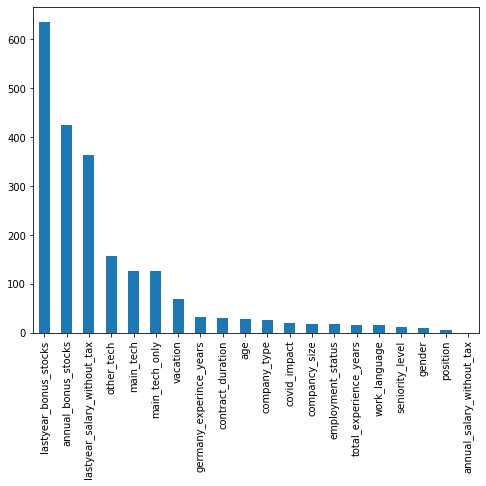

In [26]:
new_nulls = salary_data.isnull().sum().sort_values(ascending=False)
total_nulls = new_nulls.head(20)
total_nulls.plot(kind="bar", figsize = (8,6), fontsize = 10)

For easier detection of missing values, pandas provides the isna(), isnull(), and notna() functions.

Numerical columns:age, total_experince, german_experince, annual_bonus_stocks

for our analysis, let's consider age in month to investigate for missing values: 


In [27]:
len(salary_data[salary_data["age"].isna()])

27

In [28]:
len(salary_data[salary_data["age"].isna()])

27

Here we can see that age columns have total 18 rows will missing data/ nulls. Let's find the range, mean, median, mode for total_experince field to understand what make sense to impute or remove missing values. 

In [29]:
range_val = (salary_data["age"].max()) - (salary_data["age"].min())
print("Range of age: {}".format(range_val))
print("Mean of age: {}".format(round(salary_data["age"].mean(),2)))
print("Median of age: {}".format(salary_data["age"].median()))
print("Mode of age: {}".format(salary_data["age"].mode()[0]))


Range of age: 49.0
Mean of age: 32.54
Median of age: 32.0
Mode of age: 30.0


In [30]:
subset_data = salary_data["age"].value_counts(sort=True,ascending=False)


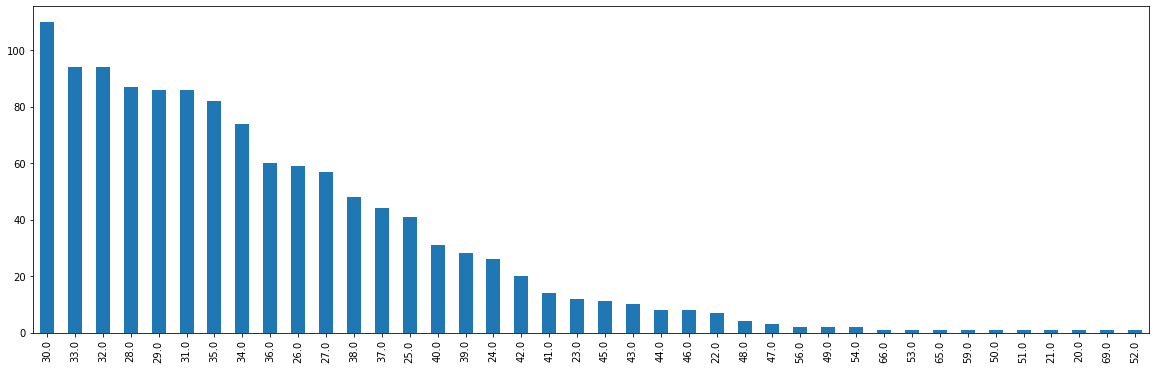

In [31]:
subset_data.plot(kind="bar", figsize = (20,6), fontsize = 10)


In [32]:
salary_data["age"].fillna(salary_data["age"].mean(), inplace = True)

In [33]:
salary_data["age"].isna().sum()

0

18 rows, containing a missing value in the "age", now has been replaced with the mean value.


## Phase 6: **Handling the Outliers**

 An outlier can be due to some mistakes in data collection or recording, or due to natural high variability of data points. How to treat an outlier highly depends on our data or the type of analysis to be performed.
1. Uni-variate analysis (using one variable analysis) - detect an outlier visually, by box plots 
2. or Multi-variate analysis (using two or more variables) -  detect an outlier visually, by scatter plots.

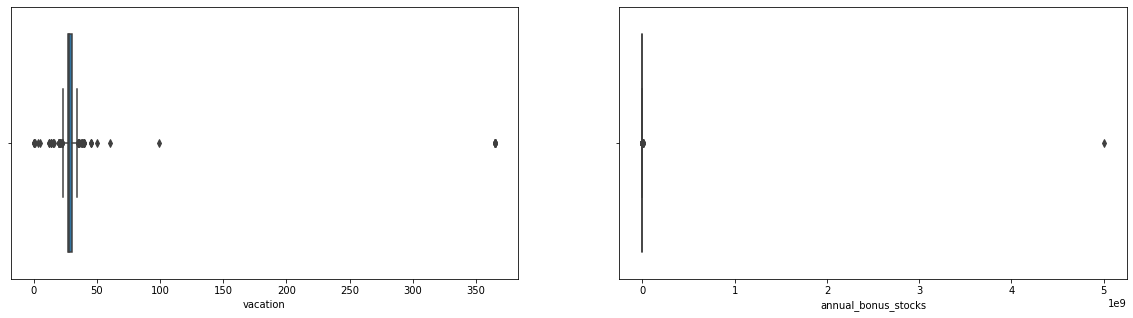

In [34]:
fig, ax =plt.subplots(1,2,figsize=(20,5))
sns.boxplot(x=salary_data['vacation'], ax=ax[0])
sns.boxplot(x=salary_data['annual_bonus_stocks'], ax=ax[1])
fig.show()


In [35]:

salary1 = salary_data[salary_data["annual_salary_without_tax"] > 80000]
salary_low = salary_data[salary_data["annual_salary_without_tax"] < 80000]

# salary1.vacation.describe()

salary_data["annual_salary_without_tax"].max()

99999999999

Text(0.5, 1.0, '')

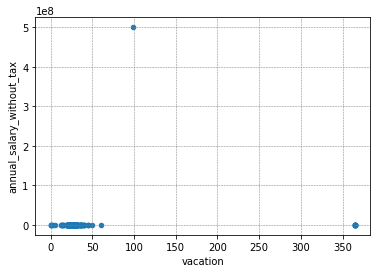

In [36]:
## vacation before removing outliers:

salary_data.plot.scatter(x='vacation',
                      y='annual_salary_without_tax')
plt.grid(linewidth= 0.5, color='grey', linestyle='--', in_layout = True)
# plt.ylim(0, 100000000)
plt.title("")
# salary_data.shape

(1169, 23)


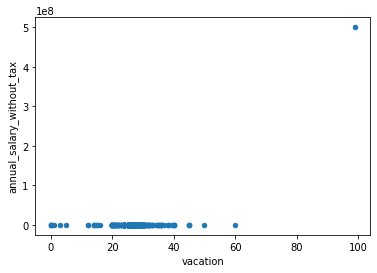

In [37]:
## vacation after removing outlier:


new_sal = salary_data[salary_data["vacation"]< 350]
# new_sal = salary_data.loc[salary_data["vacation"] < 300000]


new_sal.plot.scatter(x='vacation',
                      y='annual_salary_without_tax')

print(new_sal.shape)


As we can see from these two plots, we have some points that are plotted outside the box plot area and that greatly deviate from the rest of the population. Whether to remove or keep them will greatly depend on the understanding of our data and the type of analysis to be performed. In this case, the points that are outside of our box plots in the 'vacation' and the 'annual_bonus_stocks' might be the actual true data points and do not need to be removed.

(1247, 23)

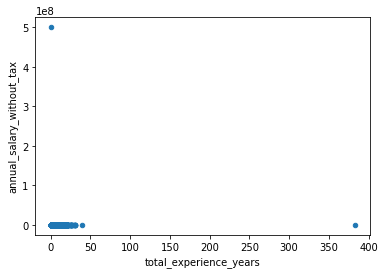

In [38]:
## annual_salary_without_tax before removing outliers:

salary_data.plot.scatter(x='total_experience_years',
                      y='annual_salary_without_tax')

salary_data.shape

From the above graph, there is values above 300 . total_experience_years that deviate from the rest of the population and do not seem to follow the trend. 

The other two observations on the top are also deviating from the rest of the points but they also seem to be following the trend, so, perhaps, they can be kept.

(1227, 23)

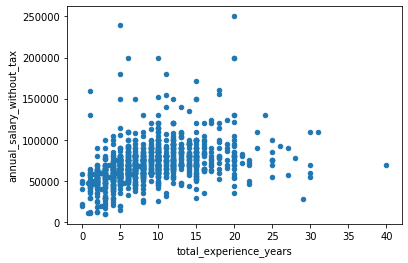

In [39]:
## annual_salary_without_tax after removing outlier:


salary_data = salary_data[salary_data["total_experience_years"]< 350]
salary_data = salary_data.loc[salary_data["annual_salary_without_tax"] < 300000]


salary_data.plot.scatter(x='total_experience_years',
                      y='annual_salary_without_tax')

salary_data.shape



As you can see, we do not have the last point of the total_experience_years' anymore.

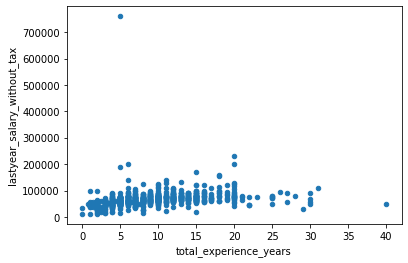

In [40]:
### lastyear_salary_without_tax before removing outliers:
salary_data.plot.scatter(x='total_experience_years',
                      y='lastyear_salary_without_tax')

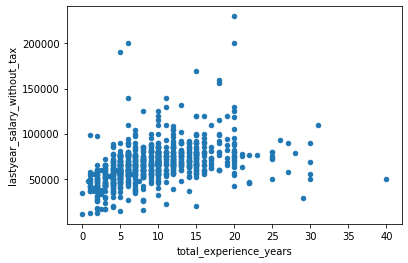

In [41]:
### lastyear_salary_without_tax after removing outliers:

new_data = salary_data.loc[salary_data["lastyear_salary_without_tax"] < 600000]
new_data.plot.scatter(x='total_experience_years',
                      y='lastyear_salary_without_tax')



* do we really need to remove outliers?? outlier vlaues is lastyear_salary_without_tax > $ 700000. but this reduces the overlal dataset to 878 rows which is very low for further machine learning capabilities. Hence, we will keep this outlier as is

## Phase 7: Exploratory Data Analysis(EDA) using visualization

In [42]:
salary_data.shape

(1227, 23)

In [43]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1227 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year                         1227 non-null   int64  
 1   age                          1227 non-null   float64
 2   gender                       1222 non-null   object 
 3   city                         1227 non-null   object 
 4   position                     1225 non-null   object 
 5   total_experience_years       1227 non-null   float32
 6   germany_experince_years      1201 non-null   float32
 7   seniority_level              1219 non-null   object 
 8   main_tech                    1108 non-null   object 
 9   other_tech                   1080 non-null   object 
 10  annual_salary_without_tax    1227 non-null   int64  
 11  annual_bonus_stocks          815 non-null    float64
 12  lastyear_salary_without_tax  879 non-null    float64
 13  lastyear_bonus_sto

According to the output above, we have 1137 entries, 0 to 1252, as well as 22 features. The "Non-Null Count" column shows the number of non-null entries. If the count is 2930 then there is no missing values for that particular feature. 'annual_salary_without_tax' is our target or response variable and the rest of the features are our predictor variables. We also have a mix of numerical (28 int64 and 11 float64) and object data types.

Next, let's use the `describe()` function to show the count, mean, min, max of the Salary attribute.


In [44]:
print(round(salary_data["annual_salary_without_tax"].describe(),2))

count      1227.00
mean      71027.07
std       23357.42
min       10001.00
25%       58900.00
50%       70000.00
75%       80000.00
max      250000.00
Name: annual_salary_without_tax, dtype: float64


From the above analysis, it is important to note that the minimum value is greater than 0. Also,the difference between the minimum value and the 25th percentile is smaller than the 75th percentile and the maximum value. This means that our data might not be normally distributed but it's left skewed (an important assumption for linear regression analysis), so will check for normality in the Log Transform section.

The `describe()` function reveals the statistical information about the numeric attributes. To reveal some information about our categorical (object) attributes, we can use `value_counts()` function. In this exercise, describe all categories of the 'position' attribute.

In [45]:
## Information about our categorical (object) attributes:

print(round(salary_data.position.value_counts(),2)[:5], "\n")


Software Engineer     381
Backend Developer     170
Data Scientist        108
Frontend Developer     86
Qa Engineer            70
Name: position, dtype: int64 



In [46]:
# # !pip install -U seaborn

# import seaborn as sns
# print(sns.__version__)

### Univariate Analysis

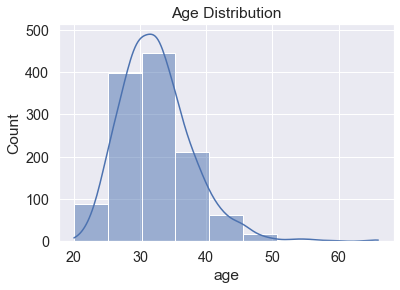

Age Descriptive Statistics


count    1227.0
mean       32.0
std         5.0
min        20.0
25%        29.0
50%        32.0
75%        35.0
max        66.0
Name: age, dtype: float64

In [47]:
sns.set(font_scale=1.3)
sns.histplot(salary_data.age,bins=9,kde=True)
plt.title('Age Distribution')
plt.show()

print('Age Descriptive Statistics')
salary_data['age'].describe().round()



* here you can see that large working population falls under 40.the minimum start age of employement is 20 years. While 25% of working population is under 29year and 50% of working group is under 32 years. Hence, working population age is heavily skewed on younger age groups. There average retirement age is 60 and hence we an see there is no to limited data for population above 60

In [48]:
remove = ["Senior","Middle","Lead","Junior","Head","Principal","VP"]
new_data = salary_data[salary_data["seniority_level"].isin(remove)]


new_data["experience_years"] = pd.cut(new_data['total_experience_years'], bins=[0, 10, 20, 30, 40], include_lowest=True, labels=['<10 years', '10-20 years', '20-30 years', '> 40 years'])
new_data.experience_years.unique()


['<10 years', '10-20 years', '20-30 years', '> 40 years']
Categories (4, object): ['<10 years' < '10-20 years' < '20-30 years' < '> 40 years']

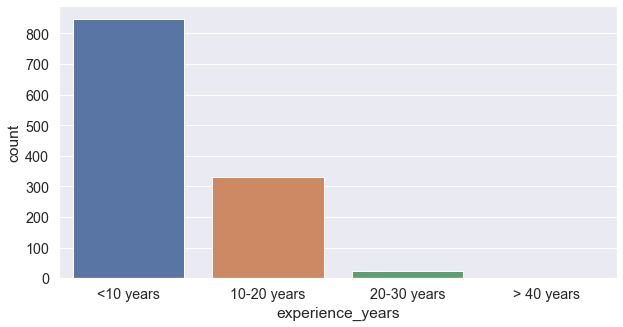

In [49]:
fig= plt.subplots(figsize= (10,5))

sns.countplot(data=new_data, x="experience_years")


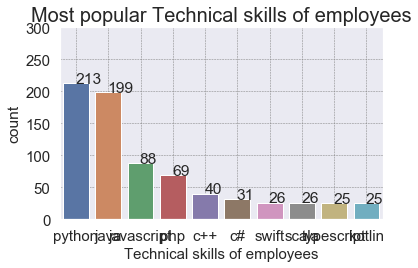

In [50]:
top10_tech = salary_data.main_tech_only.value_counts()[:10]

technology_data =  salary_data[salary_data.main_tech_only.isin(top10_tech.index)]                

ax = sns.countplot(data=technology_data, x="main_tech_only", order = top10_tech.index.values)

## add annotations: 
for p, label in zip(ax.patches, technology_data["main_tech_only"].value_counts().values):
    ax.annotate(label, (p.get_x()+0.375, p.get_height()+0.05))
plt.title("Most popular Technical skills of employees",fontsize = 20)
plt.xlabel("Technical skills of employees",fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylim(0, 300)
plt.grid(linewidth= 0.5, color='grey', linestyle='--', in_layout = True)
plt.tight_layout()

### Bivariate Analysis – Exploring the Relationship Between Two Variables in the Dataset

##### Average years of Experince by Seniority Level

Text(0.5, 0, 'Seniority Level')

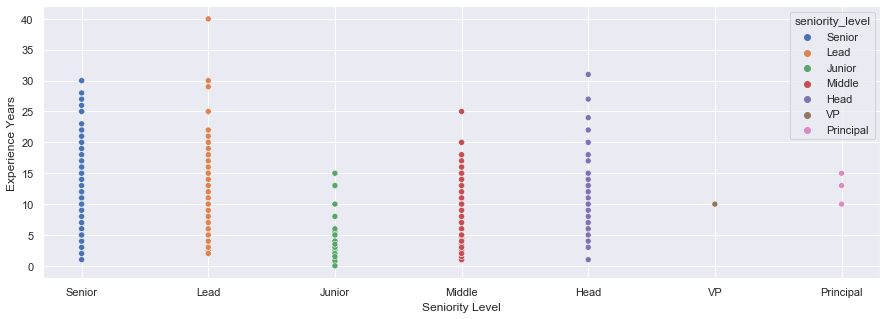

In [51]:
# fig= plt.subplots(figsize= (10,5))
sns.set(rc={"figure.figsize":(15, 5)})

sns.scatterplot(x = 'seniority_level', y = 'total_experience_years', data = new_data,  hue="seniority_level")
plt.ylabel('Experience Years')
plt.xlabel('Seniority Level')



* the ratio of Seniority level in workplace vary by number of work years. In above figure, we can see there are more professionals in senior, lead and junor or lead

#### Salary distribution over two years 2020 and 2021

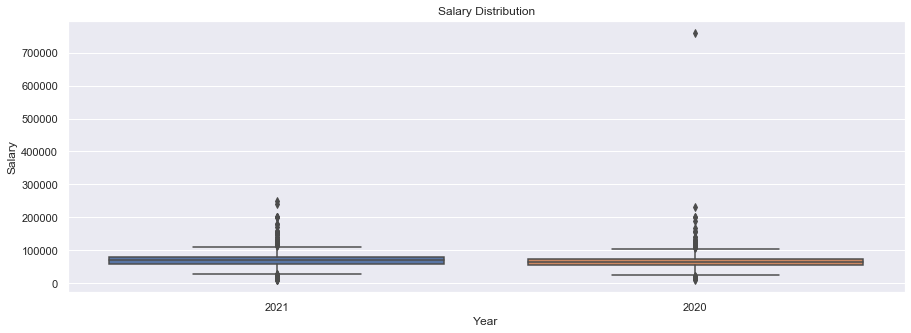

annual_salary_without_tax  lastyear_salary_without_tax
count                     1227.0                        879.0
mean                     71027.0                      67332.0
std                      23357.0                      31620.0
min                      10001.0                      11000.0
25%                      58900.0                      55000.0
50%                      70000.0                      65000.0
75%                      80000.0                      75000.0
max                     250000.0                     760000.0

In [52]:
g=sns.boxplot(data=salary_data.loc[:,['annual_salary_without_tax','lastyear_salary_without_tax']])
g.set_xticklabels(['2021', '2020'])
plt.title('Salary Distribution')
plt.ylabel('Salary')
plt.xlabel('Year')
plt.show()

salary_data[['annual_salary_without_tax','lastyear_salary_without_tax']].describe().round()


#### Bonus and Stocks Distribution over two years


annual_bonus_stocks  lastyear_bonus_stocks
count                815.0                  608.0
mean               21544.0                21502.0
std                53691.0                33425.0
min                    0.0                    0.0
25%                    0.0                    0.0
50%                 5000.0                 5000.0
75%                20000.0                36100.0
max              1150000.0               300000.0

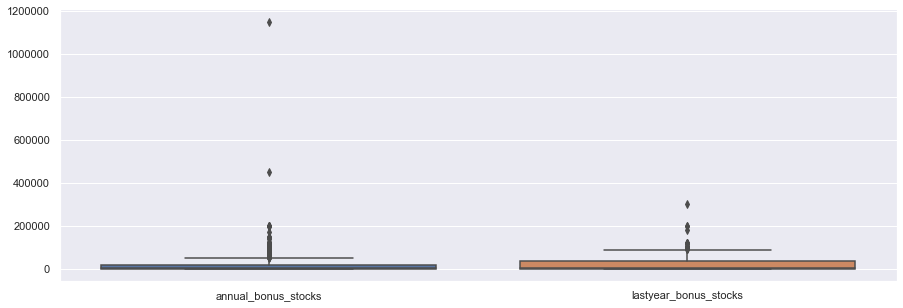

In [53]:
sns.boxplot(data = salary_data.loc[:,["annual_bonus_stocks", "lastyear_bonus_stocks"]])
salary_data[['annual_bonus_stocks','lastyear_bonus_stocks']].describe().round()
salary_data.shape

salary_data[['annual_bonus_stocks','lastyear_bonus_stocks']].describe().round()


### Language used per company type

In [54]:
import plotly.express as px


sns.set(rc={"figure.figsize":(15, 10)})
plt.style.use('dark_background')



top3_lang = salary_data.work_language.value_counts()[:3]
top3_orgtype = salary_data.company_type.value_counts()[:3]

lang = salary_data[salary_data.work_language.isin(top3_lang.index) & salary_data.company_type.isin(top3_orgtype.index)]

new_lang =  pd.crosstab(lang.company_type, lang.work_language).reset_index()
fig = px.bar(new_lang, x="company_type", y = ["German","Russian", "English"], title="Language per company type in Germany")

fig.show()


the survey showed that most IT professionals speak English at work. But, now, this tendency prevails also in German consulting. It also holds for other types of companies in Germany (product companies, startups).

#### Gender distribution for Salary versus Years of Experience:

How to Adjust the Figure Size of a Seaborn Plot: https://www.statology.org/seaborn-figure-size/

How to Change the Position of a Legend in Seaborn : https://www.statology.org/seaborn-legend-position/

Male       1034
Female      186
Diverse       2
Name: gender, dtype: int64


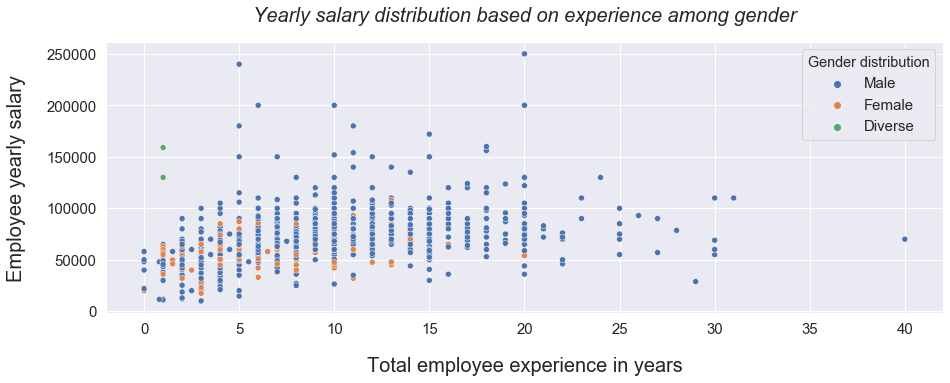

In [55]:
# fig,ax = plt.subplots(figsize = (10,5))
# ax.set(xticks=[0,5, 10,15,20,25,30,35,40], yticks=[50000, 100000, 150000,200000,250000])

sns.set(rc={"figure.figsize":(15, 5)}) #width=3, #height=4
sns.scatterplot(data = salary_data, x="total_experience_years", y="annual_salary_without_tax", hue="gender")

### changing the styling of graphs for better visulization: 

plt.legend(loc='upper right', fontsize = 15, title='Gender distribution', title_fontsize='large')
plt.title(label = "Yearly salary distribution based on experience among gender",loc='center',  
          fontsize = 20, pad= 20.0,fontstyle='italic')
plt.xlabel('Total employee experience in years', fontsize = 20, labelpad= 20.0)
plt.ylabel('Employee yearly salary', fontsize = 20, labelpad= 20.0)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

salary_data.shape
print(salary_data.gender.value_counts())

In [56]:
top7_city = salary_data.city.value_counts()[:7]
top7_city = salary_data[salary_data["city"].isin(top7_city.index)]
# top7_city_roles

top7_city[top7_city["position"].isin]

Empty DataFrame
Columns: [year, age, gender, city, position, total_experience_years, germany_experince_years, seniority_level, main_tech, other_tech, annual_salary_without_tax, annual_bonus_stocks, lastyear_salary_without_tax, lastyear_bonus_stocks, vacation, employment_status, сontract_duration, work_language, compancy_size, company_type, covid_impact, date, main_tech_only]
Index: []

[0 rows x 23 columns]

#### Employee concentration across work locations

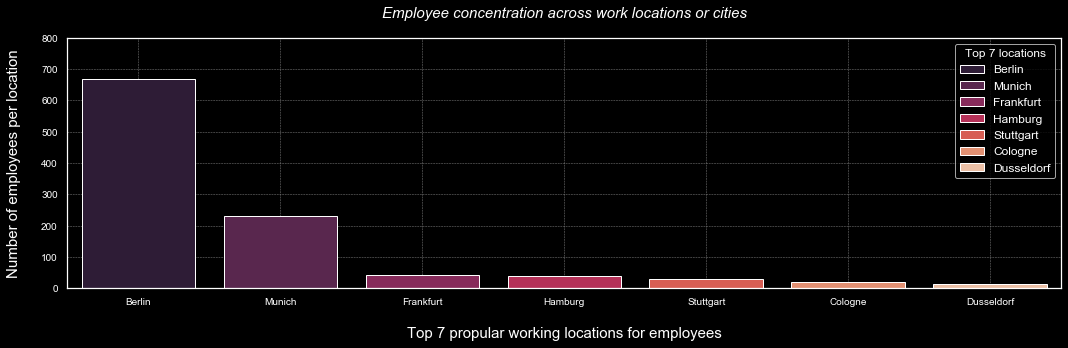

In [57]:
##https://seaborn.pydata.org/generated/seaborn.countplot.html
##https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.grid.html

sns.set(rc={"figure.figsize":(15, 5)})
plt.style.use('dark_background')
order_plot = top7_city.groupby("city", axis =0).size().sort_values(ascending = False).index.values

sns.countplot(data = top7_city , x="city",hue = "city",dodge = False, 
              order = order_plot, hue_order =  order_plot , 
              palette = sns.color_palette("rocket", n_colors = len(order_plot)))
plt.title(label = "Employee concentration across work locations or cities", pad=20.0, fontsize = 15, loc ='center', 
         fontstyle ='italic')
plt.legend(loc='upper right', fontsize =12, title = 'Top 7 locations', title_fontsize = 'medium')
plt.xlabel('Top 7 propular working locations for employees', fontsize = 15,labelpad=20.0)
plt.ylabel('Number of employees per location', fontsize = 15, labelpad=20.0)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.ylim(0, 800)
plt.grid(linewidth= 0.5, color='grey', linestyle='--', in_layout = True)

plt.tight_layout()
plt.show()

Here we can see that most of the emplyees around 690 employees work based out of berlin location, over 250 employees work from Munich and very few employee perfer to work from dusseldorf location. The salary can vary based on the location as well. let's take a look at salary distribution based location of these employee group.


### Seaborn barplot: 
we will use [barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html) from seaborn after refomrating using groupby: 

seaborn.barplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, errcolor='.26', errwidth=None, capsize=None, dodge=True, ci='deprecated', ax=None, **kwargs)

some ideas on color [palette](https://seaborn.pydata.org/tutorial/color_palettes.html):
- sns.color_palette()
- sns.color_palette("flare")
- print(sns.color_palette("flare").as_hex())
-  [reverse order](https://python-graph-gallery.com/101-make-a-color-palette-with-seaborn/#:~:text=If%20you%20want%20the%20reverse,to%20color%20of%20your%20choice) of colors (darker to lighter), you can simply add the suffix "_r" to color of your choice
- Annotation values on bars is not easy on seaborn 
- plt.style.available

### Salary distribution of employees across work locations


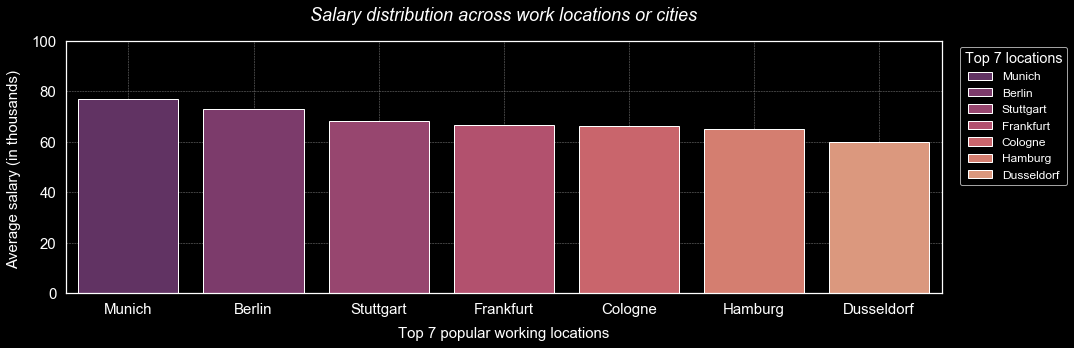

In [58]:
## checking the salary across cities: 
##DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, observed=False, dropna=True)
df_salary_city = top7_city.groupby(by= ["city"], axis =0, as_index=True, sort=True, dropna= False).mean()
df_salary_city["annual_salary_without_tax_(thousand)"] = (df_salary_city["annual_salary_without_tax"]/1000).round(2)
df_salary_city.iloc[:,:5]


## reformating: 
top7_city["annual_salary_without_tax_(thousand)"] = (top7_city["annual_salary_without_tax"]/1000).round(2)

## "\" --- indicates/works as connector
## .index --- gives us the ordered list otherwise it gives all columns
## .index.values --- this gives us array of ordered list 
plot_order = top7_city.groupby("city", axis =0).mean()\
        .sort_values("annual_salary_without_tax_(thousand)", ascending = False).index


## setting plot display: 
# sns.set_style(rc = {'axes.facecolor': 'black'})
sns.set(rc={"figure.figsize":(15, 5)})
plt.style.use('dark_background')

## plotting the graph:
sns.barplot(data = top7_city , x="city", y= "annual_salary_without_tax_(thousand)", hue = "city",  estimator='mean', 
            order = plot_order,hue_order =  plot_order , 
            palette = sns.color_palette("flare_r",n_colors = len(plot_order)),
            errorbar=None, dodge = False) ## optional last 2 parameters, dodge gives us the wider bar

plt.title(label = "Salary distribution across work locations or cities", pad=20.0, fontsize = 18, loc ='center', 
         fontstyle ='italic')
plt.legend(loc='upper right', fontsize =12, title = 'Top 7 locations', title_fontsize = 'large', 
           bbox_to_anchor=(1.15,1)) ## pushes legend box outside the graph with X distance
plt.xlabel('Top 7 popular working locations', fontsize = 15,labelpad=10.0)
plt.ylabel('Average salary (in thousands) ', fontsize = 15, labelpad=10.0)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylim(0, 100) ## only applicable for numeric data
plt.grid(linewidth= 0.5, color='grey', linestyle='--',in_layout = True)

plt.tight_layout()
plt.show()


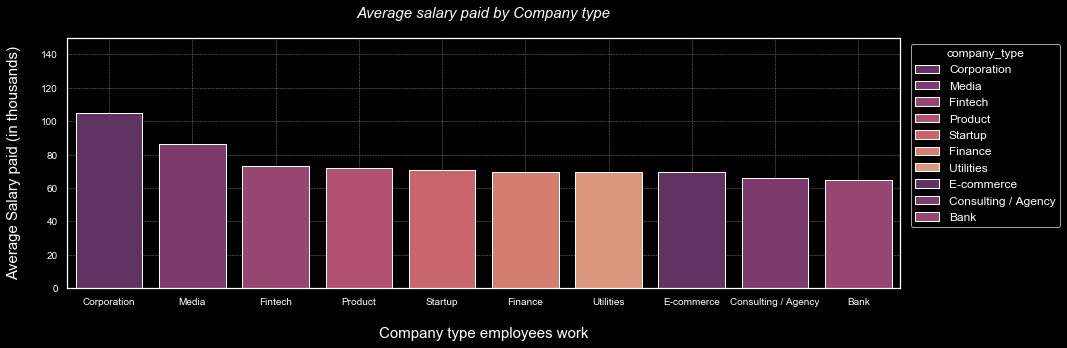

In [59]:
company_type = salary_data.company_type.value_counts()[:10]
company_type = salary_data[salary_data["company_type"].isin(company_type.index)]
company_type["annual_salary_without_tax_(thousand)"] = (company_type["annual_salary_without_tax"]/1000).round(2)


sns.set(rc={"figure.figsize":(15, 5)})
plt.style.use('dark_background')
order_plot = company_type.groupby("company_type", axis =0).mean()
order_plot = order_plot.sort_values(by= "annual_salary_without_tax_(thousand)",ascending = False).index.values

## plotting the graph:
sns.barplot(data = company_type , x="company_type", y= "annual_salary_without_tax_(thousand)", 
            hue = "company_type",  
            estimator='mean', 
            order = order_plot,hue_order =  order_plot , 
            palette = sns.color_palette("flare_r",n_colors = len(plot_order)),
            errorbar=None, dodge = False) ## optional last 2 parameters, dodge gives us the wider bar

plt.title(label = "Average salary paid by Company type", pad=20.0, fontsize = 15, loc ='center', 
         fontstyle ='italic')
plt.legend(loc='upper right', fontsize =12, title ="company_type", title_fontsize = 'medium', bbox_to_anchor= (1.2,1))
plt.xlabel('Company type employees work', fontsize = 15,labelpad=20.0)
plt.ylabel('Average Salary paid (in thousands)', fontsize = 15, labelpad=20.0)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.ylim(0, 150)
plt.grid(linewidth= 0.5, color='grey', linestyle='--', in_layout = True)

plt.tight_layout()
plt.show()

In [60]:
top5_roles = salary_data['position'].value_counts()[:10]
top5_roles = salary_data[ salary_data['position'].isin(top5_roles.index)] ### selecting dataste wil top 5 roles
top5_roles.shape

(1030, 23)

### Salary distribution based on total experince by gender

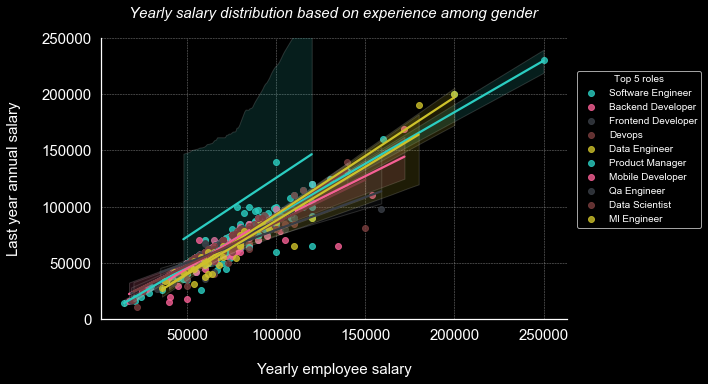

In [61]:
# fig, ax = plt.subplots(figsize=(6, 6))
sns.lmplot(x='annual_salary_without_tax',y='lastyear_salary_without_tax',hue='position',legend= False,legend_out =True,
              data=top5_roles, palette=['#2BCDC1','#F66095','#393E46','#7A3E3E','#CDC12B'],height=5.5, aspect=2)
#height=6, aspect = 2 means (width= 2 times larger than height)

plt.legend(loc='upper right', fontsize = 10, title='Top 5 roles', title_fontsize='small', bbox_to_anchor = (1.3,0.9))
plt.title(label = "Yearly salary distribution based on experience among gender",loc='center',  
          fontsize = 15, pad= 20.0,fontstyle='italic')
plt.xlabel('Yearly employee salary', fontsize = 15, labelpad= 20.0)
plt.ylabel('Last year annual salary', fontsize = 15, labelpad= 20.0)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0,250000)
plt.tight_layout()
plt.grid(linewidth= 0.5, color='grey', linestyle='--',in_layout = True)

plt.show()

Employee with engineering roles like software engineer,Data engineers,  frontend developer have high paying jobs over teo year time period 


In [62]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1227 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year                         1227 non-null   int64  
 1   age                          1227 non-null   float64
 2   gender                       1222 non-null   object 
 3   city                         1227 non-null   object 
 4   position                     1225 non-null   object 
 5   total_experience_years       1227 non-null   float32
 6   germany_experince_years      1201 non-null   float32
 7   seniority_level              1219 non-null   object 
 8   main_tech                    1108 non-null   object 
 9   other_tech                   1080 non-null   object 
 10  annual_salary_without_tax    1227 non-null   int64  
 11  annual_bonus_stocks          815 non-null    float64
 12  lastyear_salary_without_tax  879 non-null    float64
 13  lastyear_bonus_sto

## Phase 8: Looking for Correlations: 

 it is useful to establish a correlation between the response variable (in our case the Annual Salary) and other predictor variables, as some of them might not have any major impact in determining the salary of the employee and will not be used in the analysis. There are many ways to discover correlation between the target variable and the rest of the features. Building pair plots, scatter plots, heat maps, and a correlation matrixes are the most common ones. Below, we will use the corr() function to list the top features based on the pearson correlation coefficient (measures how closely two sequences of numbers are correlated). Correlation coefficient can only be calculated on the numerical attributes (floats and integers), therefore, only the numeric attributes will be selected.

In [98]:
salary_num = salary_data.select_dtypes(include = ['float64','float32','int64'])

salary_num = salary_num[['year', 'age', 'total_experience_years', 'germany_experince_years',
        'annual_bonus_stocks','lastyear_salary_without_tax', 'lastyear_bonus_stocks', 'vacation', 'annual_salary_without_tax']]
salary_num_corr = salary_num.corr()['annual_salary_without_tax'] ##[:-1] # -1 means that the latest row is annual_salary_without_tax

# # # # top_features:
# # # ## not excluding any numerical features and there are very few
top_features = salary_num_corr[abs(salary_num_corr) >= 0.1].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print("There is {} strongly correlated values with Annual Salary without tax:\n \n{}".format(len(top_features), top_features))

top_features = top_features.index
salary_top_features = salary_num[top_features]
salary_top_features

There is 7 strongly correlated values with Annual Salary without tax:
 
annual_salary_without_tax      1.000000
total_experience_years         0.387654
lastyear_salary_without_tax    0.302981
germany_experince_years        0.282952
annual_bonus_stocks            0.271289
age                            0.236614
lastyear_bonus_stocks          0.174607
Name: annual_salary_without_tax, dtype: float64


annual_salary_without_tax  total_experience_years  \
0                         80000                     5.0   
1                         80000                     7.0   
2                        120000                    12.0   
3                         54000                     4.0   
4                         62000                    17.0   
...                         ...                     ...   
1248                      70000                     9.0   
1249                      60000                    10.0   
1250                     110000                    15.0   
1251                      38350                     7.0   
1252                      65000                     2.0   

      lastyear_salary_without_tax  germany_experince_years  \
0                         75000.0                      3.0   
1                         82000.0                      4.0   
2                        100000.0                      6.0   
3                         62000.0                      1.0   
4                         62000.0                      6.0   
...                           ...                      ...   
1248                      70000.0                      5.0   
1249                      48000.0                      1.5   
1250                      90000.0                      2.0   
1251                      33800.0                      7.0   
1252                      40000.0                      2.0   

      annual_bonus_stocks   age  lastyear_bonus_stocks  
0                  5000.0  26.0                10000.0  
1                120000.0  26.0                 5000.0  
2                120000.0  29.0               100000.0  
3                  5000.0  28.0                 5000.0  
4                  5000.0  37.0                 5000.0  
...                   ...   ...                    ...  
1248              72000.0  31.0                72000.0  
1249               3000.0  33.0                 2500.0  
1250                  0.0  39.0                36400.0  
1251              40950.0  26.0                36400.0  
1252               6500.0  26.0                    0.0  

[1227 rows x 7 columns]

Above, there are 4 features, with coefficients greater or equal to 0.1, that are strongly correlated with the Annual salary.

Next, let's generate some par plots to visually inspect the correlation between some of these features and the target variable. We will use seaborns sns.pairplot() function for this analysis. Also, building pair plots is one of the possible ways to spot the outliers that might be present in the data.

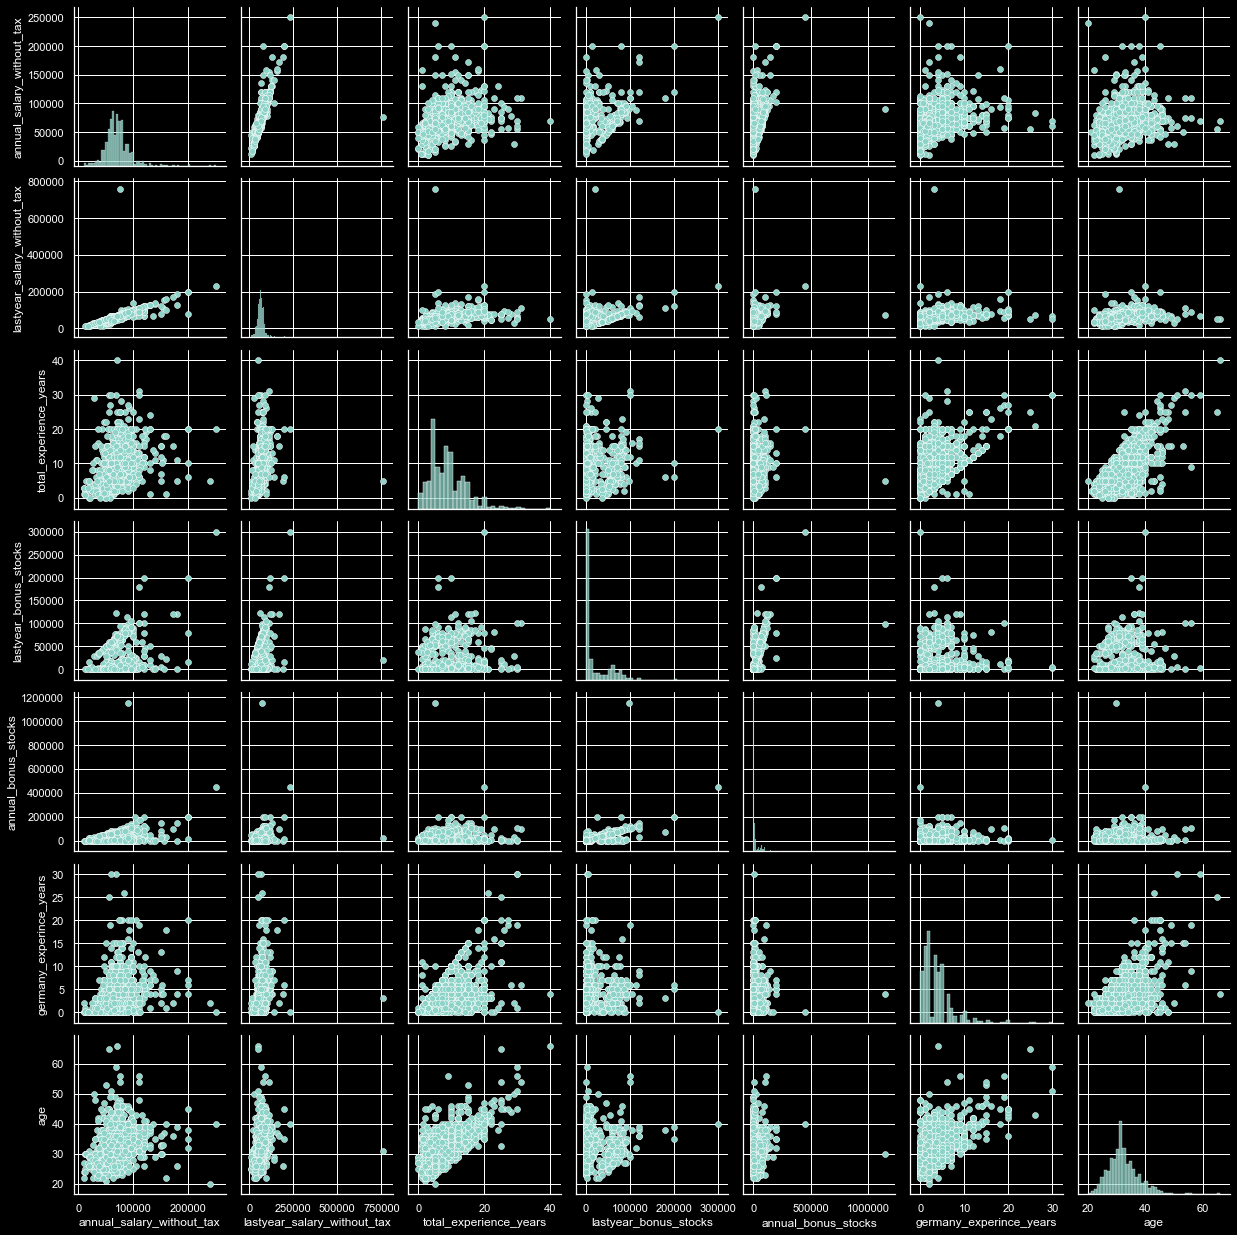

In [64]:
### https://seaborn.pydata.org/generated/seaborn.pairplot.html
# sns.pairplot(salary_num, hue= "annual_salary_without_tax", diag_kws={'bw': 1.5})
sns.pairplot(salary_top_features,  kind='scatter')
plt.grid(False)

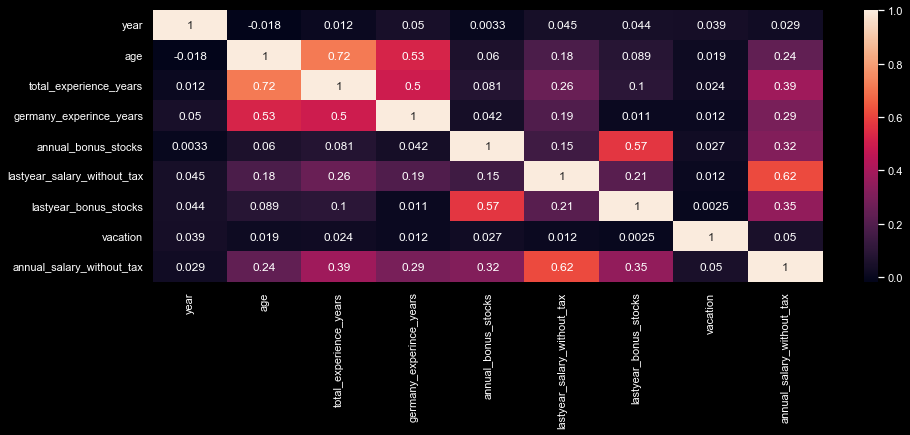

In [65]:
sns.heatmap(salary_num.corr(), annot=True)

From Pearsons Correlation Coefficients and pair plots and correlation heatmap, we can draw some conclusions about the features that are most strongly correlated to the 'Annual Salary without tax'. 
They are: 'lastyear_salary_without_tax','total_experience_years', 'lastyear_bonus_stocks','annual_bonus_stocks', 'germany_experince_years', 'age'

#### Hexbin plots: 

- we have more employees that are less/more likely to be paid higher salary.
- we see disttibution of experince on tops of the chart and distribution of yeraly salaries to employees on right side
- hex bins shows us the densities 
  * on bottom left corner, which states the more employees with less experience months plus medium yearly salary. Also, on upper left, we see that few employees with less experince months plus higher yeraly Salary

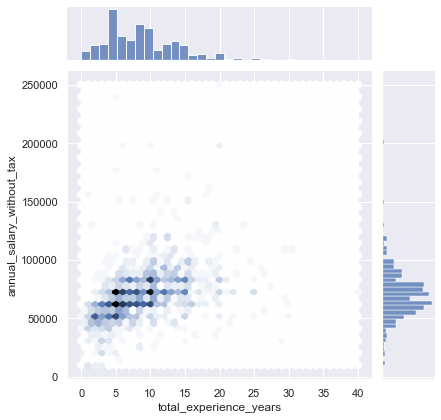

In [66]:
# plt.figure(figsize =(20,5))
sns.set(rc={"figure.figsize":(15, 5)})

sns.jointplot(data = salary_data, x= salary_data["total_experience_years"], 
             y= salary_data['annual_salary_without_tax'], kind = 'hex')

## Phase 9: Log Transformation: 

In this section, we are going to inspect whether our 'annual_salary_without_tax' data are normally distributed. The assumption of the normal distribution must be met in order to perform any type of regression analysis. There are several ways to check for this assumption, however here, we will use the visual method, by plotting the 'annual_salary_without_tax' distribution using the distplot() function from the seaborn library.

Skewness: 1.807744


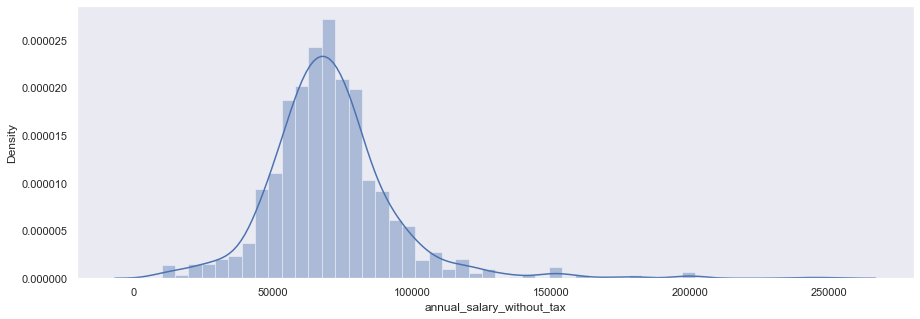

In [67]:
##Distribution of Salary: 


untransformed = sns.distplot(salary_data['annual_salary_without_tax'])
print("Skewness: %f" % salary_data['annual_salary_without_tax'].skew())
# plt.grid(linewidth= 0.5, color='grey', linestyle='--')
plt.grid(False)


As the plot shows, our 'annual_salary_without_tax' deviates from the normal distribution. It has a longer tail to the right, so we call it a positive skew. In statistics skewness is a measure of asymmetry of the distribution. In addition to skewness, there is also a kurtosis, parameter which refers to the pointedness of a peak in the distribution curve. Both skewness and kurtosis are frequently used together to characterize the distribution of data

The range of skewness for a fairly symmetrical bell curve distribution is between -0.5 and 0.5; moderate skewness is -0.5 to -1.0 and 0.5 to 1.0; and highly skewed distribution is < -1.0 and > 1.0. In our case, we have ~1.6, so it is considered highly skewed data.

Skewness: -1.115315


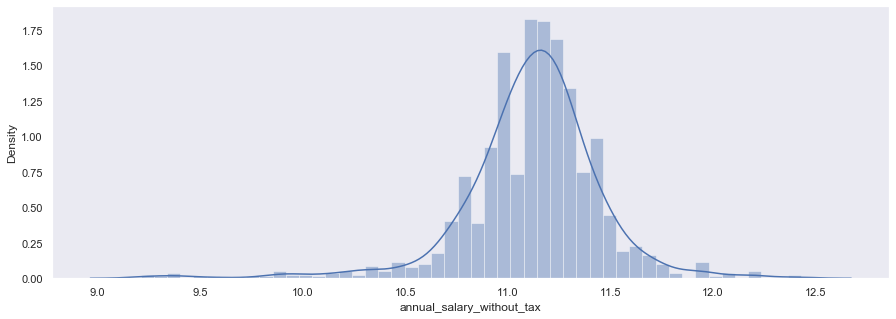

In [68]:
log_transformed = np.log(salary_data['annual_salary_without_tax'])
# log_transformed1 = np.log(log_transformed)
sns.distplot(log_transformed)
print("Skewness: %f" % (log_transformed).skew())
plt.grid(linewidth= 0.5, color='grey', linestyle='--')
plt.grid(False)



As we can see, the log method transformed the 'annual_salary_without_tax' distribution into a more symmetrical bell curve and the skewness level now is -1.11, well within the range.

In [69]:
# salary_data.columns.unique().tolist()

we will check for any null values.


In [70]:
## check nulls:
salary_data.loc[salary_data.isnull().any(axis=1)].shape

(734, 23)

Now that we have found some null points, we need to either remove them from our dataset or fill them with something else. In this case, we will use fillna() and method='ffill', which fills the last observed non-null value forward until another non-null value is encountered.

In [71]:
# salary_data = salary_data.fillna(method = 'ffill', axis='rows')
# salary_data.isnull().sum()

we have not removed null values using backfilling method since this will distor the data and might give us misleading reults with biased data

# Phase 10: Feature Engineering:
A critical part of the successful Machine Learning project is coming up with a good set of features to train on. This process is called feature engineering, and it involves three steps: feature transformation (transforming the original features), feature selection (selecting the most useful features to train on), and feature extraction (combining existing features to produce more useful ones)

Feature Transformation means transforming our features to the functions of the original features. For example, feature encoding, scaling, and discretization (the process of transforming continuous variables into discrete form, by creating bins or intervals) are the most common forms of data transformation.

- reduce categorical values to minimum categories to perform one-hot coding
- Do Label encoding for less complex catergory columns (0,1,2,3)

Categorical variables represent qualitative data with no apparent inherent mathematical meaning. Therefore, for any machine learning analysis, all the categorical data must be transformed into the numerical data types. 

Goal of feature engineering: 
* Feature Transformation
    * Dealing with Categorical Variables
        * One Hot Encoding
        *   Label Encoding
    *   Date Time Transformations
    *   Feature Selection
    *   Feature Extraction using Principal Component Analysis (PCA)


In [72]:
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

The describe() function provides the statistical information about the numerical variables. In our case, it is the 'Salary' variable.
* we might want to exclude columns not related to Annual Salary of Employee like 'annual_bonus_stocks','lastyear_salary_without_tax', 'lastyear_bonus_stocks' for obvious reasons. These columns don't provide relation of employee salary or impact but it's just give additional information about our target variable that's Annual Salary

In [73]:
salary_data.describe()

year          age  total_experience_years  \
count  1227.000000  1227.000000             1227.000000   
mean   2020.028525    32.485200                8.777180   
std       0.166535     5.478251                5.268062   
min    2020.000000    20.000000                0.000000   
25%    2020.000000    29.000000                5.000000   
50%    2020.000000    32.000000                8.000000   
75%    2020.000000    35.000000               12.000000   
max    2021.000000    66.000000               40.000000   

       germany_experince_years  annual_salary_without_tax  \
count              1201.000000                1227.000000   
mean                  3.697402               71027.074165   
std                   3.549745               23357.424672   
min                   0.000000               10001.000000   
25%                   1.000000               58900.000000   
50%                   3.000000               70000.000000   
75%                   5.000000               80000.000000   
max                  30.000000              250000.000000   

       annual_bonus_stocks  lastyear_salary_without_tax  \
count         8.150000e+02                   879.000000   
mean          2.154440e+04                 67331.737201   
std           5.369103e+04                 31619.640446   
min           0.000000e+00                 11000.000000   
25%           0.000000e+00                 55000.000000   
50%           5.000000e+03                 65000.000000   
75%           2.000000e+04                 75000.000000   
max           1.150000e+06                760000.000000   

       lastyear_bonus_stocks     vacation  
count             608.000000  1168.000000  
mean            21502.429276    30.898973  
std             33425.259882    31.289703  
min                 0.000000     0.000000  
25%                 0.000000    27.000000  
50%              5000.000000    28.000000  
75%             36100.000000    30.000000  
max            300000.000000   365.000000

In [74]:
# salary_data.plot.box(figsize=(10, 8))
salary_data[salary_data.isnull().any(axis=1)].shape

(734, 23)

Now that we have found some null points, we need to either remove them from our dataset or fill them with something else. In this case, we will use fillna() and method='ffill' or 'bfill', which fills the last observed non-null value forward until another non-null value is encountered

In [75]:
salary_data = salary_data.fillna(method = 'bfill', axis=0)
salary_data[salary_data.isnull().any(axis=1)].shape

(0, 23)

In [76]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1227 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year                         1227 non-null   int64  
 1   age                          1227 non-null   float64
 2   gender                       1227 non-null   object 
 3   city                         1227 non-null   object 
 4   position                     1227 non-null   object 
 5   total_experience_years       1227 non-null   float32
 6   germany_experince_years      1227 non-null   float32
 7   seniority_level              1227 non-null   object 
 8   main_tech                    1227 non-null   object 
 9   other_tech                   1227 non-null   object 
 10  annual_salary_without_tax    1227 non-null   int64  
 11  annual_bonus_stocks          1227 non-null   float64
 12  lastyear_salary_without_tax  1227 non-null   float64
 13  lastyear_bonus_sto

In [77]:
salary_cat = salary_data.select_dtypes(include = ['object'])
salary_cat.columns

Index(['gender', 'city', 'position', 'seniority_level', 'main_tech',
       'other_tech', 'employment_status', 'сontract_duration', 'work_language',
       'compancy_size', 'company_type', 'covid_impact', 'date',
       'main_tech_only'],
      dtype='object')

ValueError: num must be 1 <= num <= 8, not 10

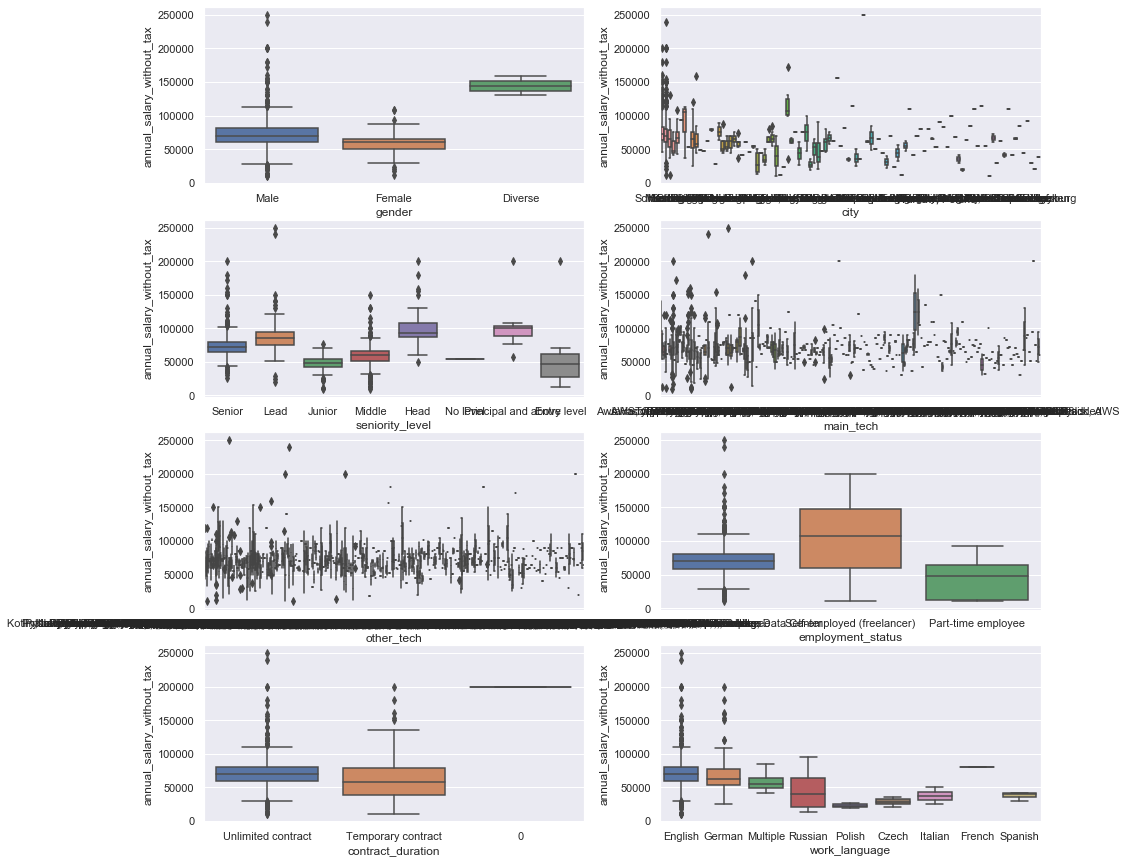

In [97]:
plt.figure(figsize=(15, 15))
plt.subplot(4,2,1)
sns.boxplot(x = 'gender', y = 'annual_salary_without_tax', data = salary_data)
plt.subplot(4,2,2)
sns.boxplot(x = 'city', y = 'annual_salary_without_tax', data = salary_data)
plt.subplot(4,2,3)
sns.boxplot(x = 'seniority_level', y = 'annual_salary_without_tax', data = salary_data)
plt.subplot(4,2,4)
sns.boxplot(x = 'main_tech', y = 'annual_salary_without_tax', data = salary_data)
plt.subplot(4,2,5)
sns.boxplot(x = 'other_tech', y = 'annual_salary_without_tax', data = salary_data)
plt.subplot(4,2,6)
sns.boxplot(x = 'employment_status', y = 'annual_salary_without_tax', data = salary_data)
plt.subplot(4,2,7)
sns.boxplot(x = 'сontract_duration', y = 'annual_salary_without_tax', data = salary_data)
plt.subplot(4,2,8)
sns.boxplot(x = 'work_language', y = 'annual_salary_without_tax', data = salary_data)
# plt.subplot(4,2,9)
# sns.boxplot(x = 'compancy_size', y = 'annual_salary_without_tax', data = salary_data)
plt.subplot(4,2,10)
sns.boxplot(x = 'company_type', y = 'annual_salary_without_tax', data = salary_data)
plt.subplot(4,2,11)
sns.boxplot(x = 'covid_impact', y = 'annual_salary_without_tax', data = salary_data)
plt.subplot(4,2,12)
sns.boxplot(x = 'main_tech_only', y = 'annual_salary_without_tax', data = salary_data)

plt.tight_layout()
plt.show()

Now we have all catergorical columns to procced with feature transformation process and a step in making feature compatible for machine learning

## Phase 10.1: Feature Transformation

Feature Transformation means transforming our features to the functions of the original features. For example, feature encoding, scaling, and discretization (the process of transforming continuous variables into discrete form, by creating bins or intervals) are the most common forms of data transformation.

##### Steps: 
* reduce categorical values to minimum categories to perform one-hot coding 
* one hot encoding catorgical column values ( new col for each col value)
* Do Label encoding for less complex catergory columns (0,1,2,3)
* Date Time Transformations is not required

**Check the categrorical values and limit the number of values to minimum**

* column/ features selected for transformation
        *seniority_level, employment_status, gender, сontract_duration, work_language, compancy_size, covid_impact

* drop columns as too many complex values to code: 
            city, main_tech, company_type, position

In [78]:
## Information about our categorical (object) attributes

# print(salary_data.covid_impact.value_counts()[:20])
# salary_data[salary_data["employment_status"].isin(filtered)]

# print(salary_data.covid_impact.unique())
salary_data.shape

(1227, 23)

In [79]:
# limit1  = salary_data.city.value_counts()
# salary_data[salary_data["city"].isin(limit.index[limit1 == 3])].shape


In [80]:
salary_data = salary_data.replace({'employment_status': {'Founder': 'Full-time employee',
                                                         'Full-time position, part-time position, & self-employed (freelancing, tutoring)': 'Full-time employee',
                                                         "full-time, but 32 hours per week (it was my request, I'm a student)":'Full-time employee', 
                                                        "working student":"Part-time employee", 
                                                        "Intern":"Part-time employee", "Werkstudent":"Part-time employee",
                                                        "Company Director":"Full-time employee"}})
salary_data.employment_status.unique()


array(['Full-time employee', 'Self-employed (freelancer)',
       'Part-time employee'], dtype=object)

In [81]:
salary_data = salary_data.replace({'seniority_level': {'No level ': 'Entry level',
                                                         'intern': 'Entry level',
                                                        "Intern" : 'Entry level',
                                                         "no idea, there are no ranges in the firm ":'Entry level', 
                                                        "C-level executive manager":"Middle", 
                                                        "Principal":"Principal and above", 
                                                       "CTO":"Principal and above",
                                                        "C-Level":"Middle",
                                                      "VP":"Principal and above", "Manager": "Middle","Work Center Manager":"Middle",
                                                      "Director": "Principal and above", "Key":"Principal and above", 
                                                      "Student" : "Entry level","Self employed" : "Entry level"}})

In [82]:
salary_data = salary_data.replace({'compancy_size': {'up to 10': "<100",
                                                     "51-100" : "<100"}})

### One Hot Encoding
In previous section, we have checked the columns like seniority_level, employment_status, gender, сontract_duration, work_language, compancy_size, covid_impact as interested one for further investigation

Now, to be recognized by a machine learning algorithms, our categorical variables should be converted into numerical ones. One way to do this is through one hot encoding.

We will use, get_dummies() method to do this transformation. In the next cell, we will transform selected attributes into their respective numeric variables. We will put all the transformed data into a 'dummy_data' data frame.

In [83]:
cat_features = ["seniority_level", "employment_status", "gender", "сontract_duration", 
                "work_language", "compancy_size", "covid_impact"]

dummy_data = pd.get_dummies(data= salary_data,columns = cat_features)

In [84]:
dummy_data.columns.tolist()

['year',
 'age',
 'city',
 'position',
 'total_experience_years',
 'germany_experince_years',
 'main_tech',
 'other_tech',
 'annual_salary_without_tax',
 'annual_bonus_stocks',
 'lastyear_salary_without_tax',
 'lastyear_bonus_stocks',
 'vacation',
 'company_type',
 'date',
 'main_tech_only',
 'seniority_level_Entry level',
 'seniority_level_Head',
 'seniority_level_Junior',
 'seniority_level_Lead',
 'seniority_level_Middle',
 'seniority_level_No level',
 'seniority_level_Principal and above',
 'seniority_level_Senior',
 'employment_status_Full-time employee',
 'employment_status_Part-time employee',
 'employment_status_Self-employed (freelancer)',
 'gender_Diverse',
 'gender_Female',
 'gender_Male',
 'сontract_duration_0',
 'сontract_duration_Temporary contract',
 'сontract_duration_Unlimited contract',
 'work_language_Czech',
 'work_language_English',
 'work_language_French',
 'work_language_German',
 'work_language_Italian',
 'work_language_Multiple',
 'work_language_Polish',
 'work_

In [85]:
print(salary_data.shape)
print(dummy_data.shape)

(1227, 23)
(1227, 48)


As we can see, we went from 22 original features in our reduced dataset to 46. This is because Pandas get_dummies() approach when applied to a column with different categories (e.g. different gender) will produce a new column (variable) for each unique categorical value (for each unique gender - female /male). It will place a one in the column corresponding to the categorical value present for that observation.

## Phase 11: Feature Selection
Here, we will select only those attributes which best explain the relationship of the independent variables with respect to the target variable, 'Annual Salary'. There are many methods for feature selection, building the heatmap and calculating the correlation coefficients scores are the most commonly used ones.

First, we will select only the relevant and newly transformed variables (and exclude variables like 'lastyear_salary_without_tax', 'lastyear_bonus_stocks', and all the original categorical variables), and place them into a 'new_data' data frame.

We will print all of our dummy_data columns.

In [86]:
dummy_data.columns

Index(['year', 'age', 'city', 'position', 'total_experience_years',
       'germany_experince_years', 'main_tech', 'other_tech',
       'annual_salary_without_tax', 'annual_bonus_stocks',
       'lastyear_salary_without_tax', 'lastyear_bonus_stocks', 'vacation',
       'company_type', 'date', 'main_tech_only', 'seniority_level_Entry level',
       'seniority_level_Head', 'seniority_level_Junior',
       'seniority_level_Lead', 'seniority_level_Middle',
       'seniority_level_No level', 'seniority_level_Principal and above',
       'seniority_level_Senior', 'employment_status_Full-time employee',
       'employment_status_Part-time employee',
       'employment_status_Self-employed (freelancer)', 'gender_Diverse',
       'gender_Female', 'gender_Male', 'сontract_duration_0',
       'сontract_duration_Temporary contract',
       'сontract_duration_Unlimited contract', 'work_language_Czech',
       'work_language_English', 'work_language_French', 'work_language_German',
       'work_lang

In [87]:

drop_col = ['lastyear_salary_without_tax', 'lastyear_bonus_stocks', 'date','annual_bonus_stocks']

new_data1 = dummy_data.loc[:, ~dummy_data.columns.isin(drop_col)]
new_data1.shape

(1227, 44)

Now we will construct a heatmap(), using the seaborn library with a newly formed data frame, 'new_data'.

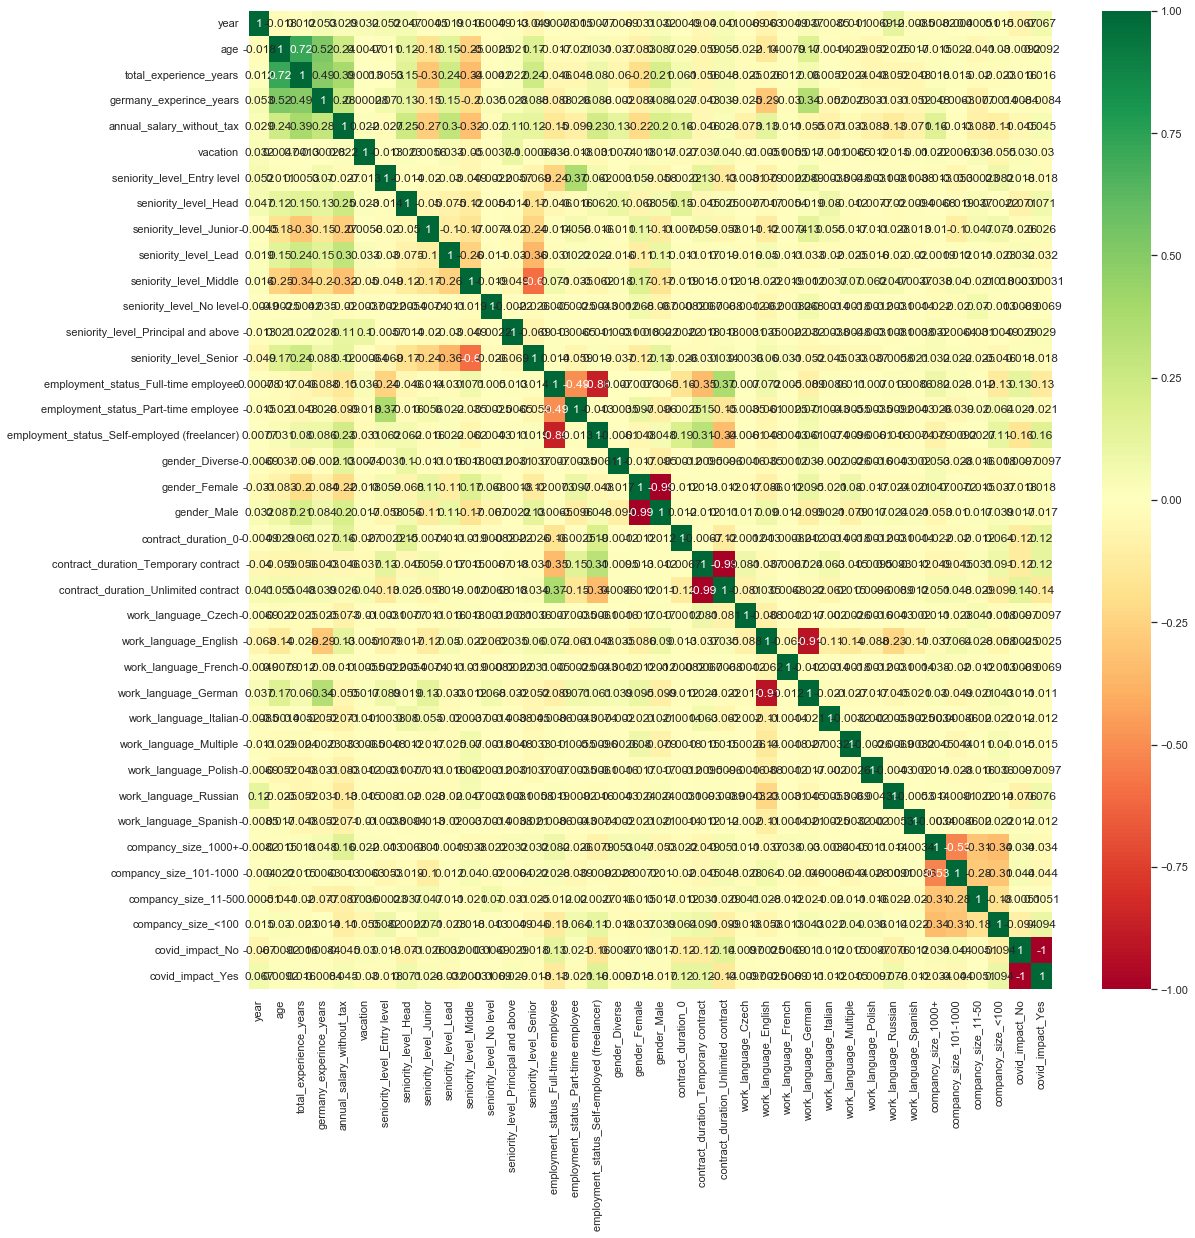

In [88]:
plt.figure(figsize=(18,18))
sns.heatmap(new_data1.corr(),annot=True,cmap='RdYlGn')

plt.show()

rom the heatmap above, extreme green means highly positively correlated features (relationship between two variables in which both variables move in the same direction), extreme red means negatively correlated features (relationship between two variables in which an increase in one variable is associated with a decrease in the other).

Now, we can use the corr() function to calculate and list the correlation between all independent variables and the 'Salary'.

In [89]:
features = new_data1.corr()['annual_salary_without_tax'].sort_values(ascending = False)
features

annual_salary_without_tax                       1.000000
total_experience_years                          0.387654
seniority_level_Lead                            0.295850
germany_experince_years                         0.282952
seniority_level_Head                            0.248538
age                                             0.236614
employment_status_Self-employed (freelancer)    0.225971
gender_Male                                     0.202563
сontract_duration_0                             0.157763
compancy_size_1000+                             0.157647
gender_Diverse                                  0.127153
work_language_English                           0.126905
seniority_level_Senior                          0.121948
seniority_level_Principal and above             0.113463
covid_impact_Yes                                0.044867
year                                            0.029011
сontract_duration_Unlimited contract            0.026022
vacation                       

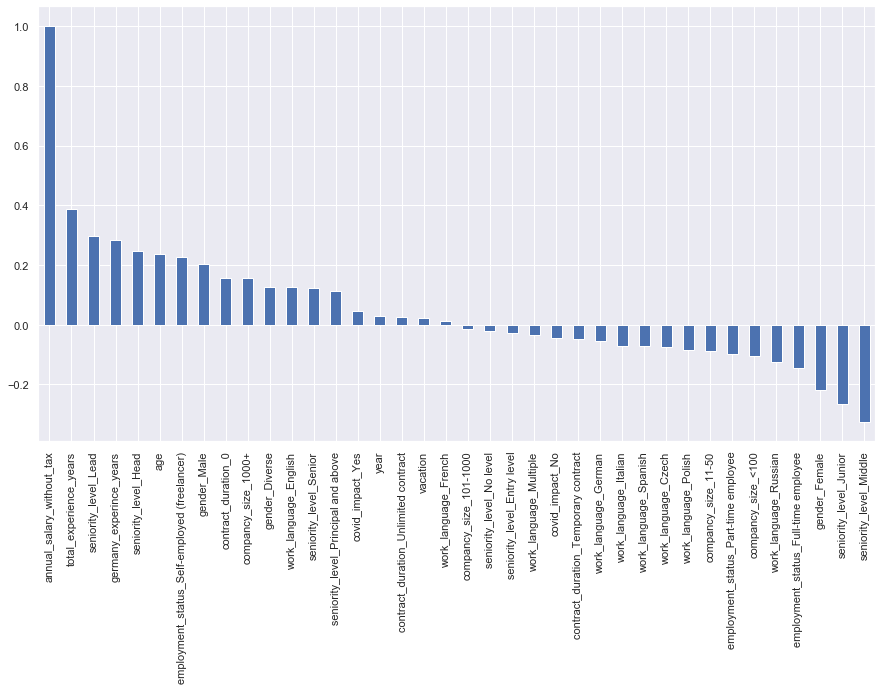

In [90]:
features.plot(kind='bar',figsize=(15,8))

# Phase 12: Feature Extraction using Principal Component Analysis (Optional)
#### PCA with Scikit-Learn
Dimentionality reduction is part of the feature extraction process that combines the existing features to produce more useful ones. The goal of dimensionality reduction is to simplify the data without loosing too much information. Principal Component Analysis (PCA) is one of the most popular dimensionality reduction algorithms. First, it identifies the hyperplane that lies closest to the data, and then it projects the data onto it. In this way, a few multidimensional features are merged into one.

First, we must scale our data using the StandardScaler() function. We will assign all the independent variables to x, and the dependent variable, 'Annual Salary', to y.

#### Feature Scaling:

One of the most important transformations we need to apply to our data is feature scaling. There are two common ways to get all attributes to have the same scale: min-max scaling and standardization.

Standardization is different: first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation, so that the resulting distribution has unit variance.


In [91]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [92]:
### get all idependent variables we are intrested in: 
drop_col = ["annual_salary_without_tax", "city", "main_tech", "company_type", "position", "other_tech"]
x = new_data1.loc[:,~new_data1.columns.isin(drop_col)]

x.columns
x.head()

year   age  total_experience_years  germany_experince_years  vacation  \
0  2020  26.0                     5.0                      3.0      30.0   
1  2020  26.0                     7.0                      4.0      28.0   
2  2020  29.0                    12.0                      6.0      30.0   
3  2020  28.0                     4.0                      1.0      24.0   
4  2020  37.0                    17.0                      6.0      29.0   

  main_tech_only  seniority_level_Entry level  seniority_level_Head  \
0     typescript                            0                     0   
1           ruby                            0                     0   
2     javascript                            0                     0   
3     javascript                            0                     0   
4             c#                            0                     0   

   seniority_level_Junior  seniority_level_Lead  ...  work_language_Multiple  \
0                       0                     0  ...                       0   
1                       0                     0  ...                       0   
2                       0                     1  ...                       0   
3                       1                     0  ...                       0   
4                       0                     0  ...                       0   

   work_language_Polish  work_language_Russian  work_language_Spanish  \
0                     0                      0                      0   
1                     0                      0                      0   
2                     0                      0                      0   
3                     0                      0                      0   
4                     0                      0                      0   

   compancy_size_1000+  compancy_size_101-1000  compancy_size_11-50  \
0                    0                       0                    0   
1                    0                       1                    0   
2                    0                       1                    0   
3                    0                       0                    0   
4                    0                       1                    0   

   compancy_size_<100  covid_impact_No  covid_impact_Yes  
0                   1                1                 0  
1                   0                1                 0  
2                   0                0                 1  
3                   1                1                 0  
4                   0                1                 0  

[5 rows x 38 columns]

In [93]:
y = new_data1[["annual_salary_without_tax"]]
y.head()

annual_salary_without_tax
0                      80000
1                      80000
2                     120000
3                      54000
4                      62000

##### Feature scaling reduces distortions caused by variables with different scales.
Classification models do not require that input features be scaled.

In [94]:
SS = StandardScaler()
scaled_x = SS.fit_transform(x.astype(np.float64))
scaled_x

ValueError: could not convert string to float: 'typescript'

Once the data is scaled, we can apply the fit_transform() function to reduce the dimensionality of the dataset down to 5 dimensions.

In [ ]:
pca = PCA(n_components = 5)
pca.fit_transform(scaled_x)

In [ ]:
explained_variance=pca.explained_variance_ratio_
explained_variance

In [ ]:
plt.figure(figsize=(10, 4))
plt.bar(range(5), explained_variance,  label='individual explained variance')
Eplt.xlabel('Principal components')
plt.legend(loc='best')
# plt.tight_layout() 

# Phase 13: Hypothesis testing

###### Formulating at least 3 hypothesis about this data: 
1. The annual salary of females is different from that of males.
2. The average salary of female are less than or equal to male employees in product based companies.
3. the annual salary of employees who know other tech/skills is higher than only one with no other skills/tech
4. Product based companies pay higher salary than other companies types
   
##### The next step is to define the hypothesis to be tested.
Hypothesis is defined in two ways - null hypothesis and alternative hypothesis:
- Null hypothesis is a statistical hypothesis which assumes that the difference in observations is due to a random factor. It is denoted by Ho.
- Alternative hypothesis is the opposite of null hypothesis. It assumes that the difference in observations is the result of a real effect. The alternate hypothesis is denoted by H1.

### Hypothesis 1: the annual salary of female is different from that of male employees

$ 𝐻_{0}:\mu_{1}-\mu_{2} = 0 $ There is no difference between the annual Salary of male and female employees.\
$ 𝐻_{A}:\mu_{1}-\mu_{2} = 0 $ There is difference between the annual Salary of male and female employees.

*The equal sign in the null hypothesis indicates that it is a 2-tailed test.*


For our project,  We will choose **5% significance level**. Therefore, our  **𝛼=0.05.** Since we have a 2-tailed test, we have to divide alpha by 2, which gives us **𝛼=0.025.** So, if the calculated p-value is less than alpha, we will reject the null hypothesis.

We will use one of the t-test, z-score, f-score or chi-squared statistics to evaluate our results.*

In [ ]:
salary_data["gender"] = salary_data["gender"].fillna("N/A")
print(salary_data.gender.isnull().sum())

female=salary_data.loc[salary_data.gender=="Female"]
male=salary_data.loc[salary_data.gender=="Male"]


In [ ]:
print(female.shape)
print(male.shape)

In [ ]:
### Now, let's select the yeraly Salary values for females and males.

f_sal = female.annual_salary_without_tax        
m_sal = male.annual_salary_without_tax        
print(f_sal.shape)
print(m_sal.shape)

Now, we will plot the distribution of 'salary' values for females and males using seaborn's `distplot()` function.


In [ ]:
sns.distplot(f_sal,color='blue',hist=False)
sns.distplot(m_sal,color='red',hist=False)
plt.grid(linewidth = 0.2)

From the graph, we already see that the two distributions are not similar.

Now, let's calculate the mean values for females and males salary.

In [ ]:
f_sal_mean = female.annual_salary_without_tax.mean()   
m_sal_mean = male.annual_salary_without_tax.mean()      
print(f_sal_mean, "  ", m_sal_mean)

Next, we will obtain our statistics, t-value and p-value. We will use scipy.stats library and ttest_ind() function to calculate these parameters.

In [ ]:
alpha=0.05 ##5% significance threshold to reject null hypo that female & male yearly salary is different
t_value, p_value = stats.ttest_ind(m_sal,f_sal)
print("t_value = ",t_value, "\n"
      "p_value = ", p_value)

Next, although optional, it is useful to print 'if/else' statements to make our conclusions about the the hypothesis.


In [ ]:
if p_value < alpha:
    print("Conclusion:\nsince p_value {} is less than alpha {} ". format (p_value,alpha))
    print("We reject the null hypothesis that there is no difference between annual salary of females and males.")
    print("Hence,there is difference between annual salary of females and males.")
    
else:
    print("Conclusion: since p_value {} is greater than alpha {} ". format (p_value,alpha))
    print("We failed to reject the null hypothesis that there is no a difference between annual salary of females and males.")

### Hypothesis 2: The average salary of female are less than or equal to male employees in product based companies

$ 𝐻_{0}:\mu_{1}<=\mu_{2} $ The average salary of female is greater than or equal to male employees in product based companies \
$ 𝐻_{A}:\mu_{1}>\mu_{2} $ The average salary of female is less than or equal to male employees in product based companies

In [ ]:
product_company = salary_data[(salary_data["company_type"]=="Product")]
gender_filtered = product_company[(product_company["gender"]=="Female") | ((product_company["gender"]=="Male"))]

sns.boxplot(x=gender_filtered.annual_salary_without_tax, 
            y = gender_filtered.gender, data = gender_filtered).set(title="Gender vs Salary")
plt.grid(False)

In [ ]:
gender_filtered.isnull().sum()

In [ ]:
female1 =gender_filtered.loc[gender_filtered.gender =="Female"]
male1=gender_filtered.loc[gender_filtered.gender =="Male"]

f_prod_sal = female1.annual_salary_without_tax
m_prod_sal = male1.annual_salary_without_tax

f_sal_mean1 = round(female1.annual_salary_without_tax.mean(),2)
m_sal_mean1 = round(male1.annual_salary_without_tax.mean(),2)      
print(f_sal_mean1, "  ", m_sal_mean1)


***The '>' sign in the alternate hypothesis indicates the test is right tailed.***

To compare the mean values of female and male employee populations, we will use a t-test. If z-values (calculated from a t-test) fall into the area on the right side of a distribution curve, this would cause us to reject the null hypothesis.

Now, we will calculate t-value and p-value of average yearly salary for female and male employee populations

In [ ]:
alpha = 0.05
t_value2, p_value2 = stats.ttest_ind(f_prod_sal, m_prod_sal)
p_value_onetail2 = (p_value2)/2
print("t_value = {} , p_value ={} , p_value_onetail = {}".format(t_value2, p_value2,p_value_onetail2))

In [ ]:

if p_value2 < 0.05: 
    print("p_value is less than 0.05 or alpha")
    print("Reject null hypothesis that average salary of female is greater than or equal to male employees in product based companies")
    print("Hence proved,The average salary of female than or equal to male employees is less in product based companies")
else: 
    print("p_value is greater than 0.05 or alpha {}".format(p_value_onetail,alpha))
    print("we failed to reject null hypothesis")
    print(" Hence proved,The average salary of female are greater than or equal to male employees in product based companies")

#### References: 

https://www.asdcode.de/2021/01/it-salary-survey-december-2020.html